In [10]:
from nltk.corpus import treebank
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import nltk
import json

In [11]:
def get_user_name(url):
    parts = url.split('/')
    fname = parts[-1]
    uname = fname.rstrip('_log.csv')
    return uname


In [12]:
#combine all 'State' and 'Action' fields to a single dataframe making each as a string
#make array like this and add to that [('Pierre', 'NNP'),
from nltk.tag import hmm

# tagged_sentence = []
# hyperparam_file='sampled-hyperparameters-config.json'
# with open(hyperparam_file) as f:
#         hyperparams = json.load(f)
# threshold = hyperparams['threshold'][1:len(hyperparams['threshold'])-1]

threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]



interaction_file_path_movies= { 'p4': np.sort(glob.glob("data/zheng/processed_interactions_p4/*")),
                                 'p3': np.sort(glob.glob("data/zheng/processed_interactions_p3/*")),
                                 'p2': np.sort(glob.glob("data/zheng/processed_interactions_p2/*")),
                                    'p1': np.sort(glob.glob("data/zheng/processed_interactions_p1/*"))
                }

interaction_file_path_birdstrikes= { 'p4': np.sort(glob.glob("data/zheng/birdstrikes_processed_interactions_p4/*")),
                                    'p3': np.sort(glob.glob("data/zheng/birdstrikes_processed_interactions_p3/*")),
                                    'p2': np.sort(glob.glob("data/zheng/birdstrikes_processed_interactions_p2/*")),
                                        'p1': np.sort(glob.glob("data/zheng/birdstrikes_processed_interactions_p1/*"))
                }

save_path_movies ={ 'p4': 'Experiments_Folder/VizRec/movies/p4',
                    'p3': 'Experiments_Folder/VizRec/movies/p3',
                    'p2': 'Experiments_Folder/VizRec/movies/p2',
                    'p1': 'Experiments_Folder/VizRec/movies/p1'
                }

save_path_birdstikes ={ 'p4': 'Experiments_Folder/VizRec/birdstrikes/p4',
                    'p3': 'Experiments_Folder/VizRec/birdstrikes/p3',
                    'p2': 'Experiments_Folder/VizRec/birdstrikes/p2',
                    'p1': 'Experiments_Folder/VizRec/birdstrikes/p1'
                }


In [9]:
#store result in dataframe
 # Create result DataFrame with columns for relevant statistics
for task in ['p1', 'p2', 'p3', 'p4']:
    print('##################################### Processing task:',task)
    result_dataframe = pd.DataFrame()
    for user in interaction_file_path_movies[task]:
        print('##################################### Processing user:',user)
        all_csv = pd.read_csv(user)
        user_tagged_sentence = []
        for i in range(len(all_csv['State'])):
            user_tagged_sentence.append((str(all_csv['State'][i]), str(all_csv['Action'][i])))
        for thres in threshold:
            print('##################################### Processing Threshold:', thres)
            predicted_tags = []
            true_tags = []
            states=[]
            for i in range(int(thres * len(user_tagged_sentence)) , len(user_tagged_sentence)):
                try:
                     trainer = nltk.HiddenMarkovModelTagger.train([user_tagged_sentence[:i]])
                     # Train the model with the first thres*len(user_tagged_sentence) data points equivalent to update the model
                     # predict the tag for the next state
                     state, true_tag = user_tagged_sentence[i]
                     prediction = trainer.tag([state])
                     predicted_tag = prediction[0][1]

                except ValueError:
                    print('Value Error')
                    continue

                predicted_tags.append(predicted_tag)
                true_tags.append(true_tag)
                states.append(state)

            assert len(states) == len(true_tags) == len(predicted_tags)
            # print('States:', states)
            print ('True Tags:', true_tags)
            print ('Predicted Tags:', predicted_tags)
            #Calculate accuracy between predicted_tags and true_tags
            accuracy = np.mean(np.array(true_tags) == np.array(predicted_tags))
            name = get_user_name(user)
            data={'User':name,'Accuracy':accuracy,'Threshold':thres,'LearningRate': 0 ,'Discount': 0,'Algorithm': 'HMM'}
            result_dataframe = pd.concat([result_dataframe, pd.DataFrame(data, index=[0])], ignore_index=True)
    result_dataframe.to_csv(save_path_movies[task]+'/HMM.csv',index=False)
    print('##################################### Saved task:',task)






##################################### Processing task: p1
##################################### Processing user: data/zheng/processed_interactions_p1/pro13_ace_p1_logs.csv
##################################### Processing Threshold: 0.1
True Tags: ['same', 'same', 'same', 'modify-1', 'modify-1', 'modify-1', 'modify-1', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same']
Predicted Tags: ['same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same']
##################################### Processing Threshold: 0.2
True Tags: ['modify-1', 'modify-1', 'modify-1', 'modify-1', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same']
Predicted Tags: ['same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 's

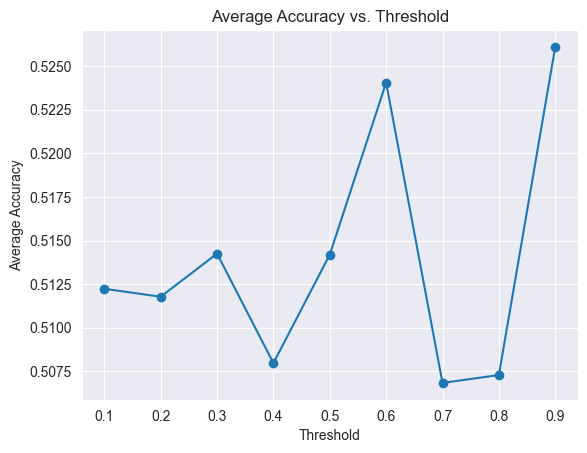

In [7]:

# Group by Threshold and calculate average Accuracy
average_accuracy = result_dataframe.groupby('Threshold')['Accuracy'].mean()

# Plot the average accuracy
plt.plot(average_accuracy.index, average_accuracy.values, marker='o', linestyle='-')

# Set the labels and title
plt.xlabel('Threshold')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. Threshold')

# Show the plot
plt.grid(True)
plt.show()


In [16]:
#store result in datafram
for task in ['p1', 'p2', 'p3', 'p4']:
    print('##################################### Processing task:', task)
    result_dataframe = pd.DataFrame()
    for user in interaction_file_path_birdstrikes[task]:
        print('##################################### Processing user:', user)
        all_csv = pd.read_csv(user)
        user_tagged_sentence = [(all_csv['State'][i], all_csv['Action'][i]) for i in range(len(all_csv['State']))]

        for thres in threshold:
            print('##################################### Processing Threshold:', thres)
            predicted_tags = []
            true_tags = []
            states=[]
            for i in range(int(thres * len(user_tagged_sentence)) , len(user_tagged_sentence)):
                try:
                     trainer = nltk.HiddenMarkovModelTagger.train([user_tagged_sentence[:i]])
                     # Train the model with the first thres*len(user_tagged_sentence) data points equivalent to update the model
                     # predict the tag for the next state
                     state, true_tag = user_tagged_sentence[i]
                     prediction = trainer.tag([state])
                     predicted_tag = prediction[0][1]

                except ValueError:
                    print('Value Error')
                    continue

                predicted_tags.append(predicted_tag)
                true_tags.append(true_tag)
                states.append(state)

            assert len(states) == len(true_tags) == len(predicted_tags)
            print('States:', states)
            print ('True Tags:', true_tags)
            print ('Predicted Tags:', predicted_tags)
            #Calculate accuracy between predicted_tags and true_tags
            accuracy = np.mean(np.array(true_tags) == np.array(predicted_tags))
            name = get_user_name(user)

            print('User:', name, 'Threshold:', thres, 'Accuracy:', accuracy)
            data = {'User': name, 'Accuracy': accuracy, 'Threshold': thres, 'LearningRate': 0, 'Discount': 0, 'Algorithm': 'HMM'}
            result_dataframe = pd.concat([result_dataframe, pd.DataFrame(data, index=[0])], ignore_index=True)
    result_dataframe.to_csv(save_path_birdstikes[task] + '/HMM.csv', index=False)
    print('##################################### Saved task:', task)






##################################### Processing task: p1
##################################### Processing user: data/zheng/birdstrikes_processed_interactions_p1/pro10_bdf_p1_logs.csv
##################################### Processing Threshold: 0.1
States: ['[1, 14, 14]', '[14, 14, 6]', '[14, 14, 6]', '[3, 14, 14]', '[3, 14, 6]', '[3, 6, 7]', '[3, 6, 7]', '[3, 14, 6]', '[3, 14, 6]', '[3, 14, 6]', '[3, 14, 6]', '[3, 14, 6]', '[3, 14, 6]', '[3, 14, 6]', '[3, 14, 6]', '[3, 14, 6]', '[3, 14, 6]', '[3, 14, 6]']
True Tags: ['modify-1', 'same', 'modify-1', 'modify-1', 'modify-1', 'same', 'modify-1', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same']
Predicted Tags: ['same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same', 'same']
User: pro10_bdf_p1 Threshold: 0.1 Accuracy: 0.7222222222222222
##################################### Processing Threshold: 0.2
States: ['[14, 14, 6]', '

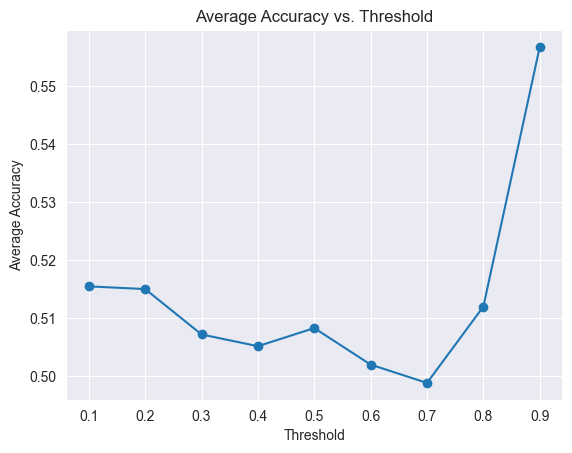

In [17]:

# Group by Threshold and calculate average Accuracy
average_accuracy = result_dataframe.groupby('Threshold')['Accuracy'].mean()

# Plot the average accuracy
plt.plot(average_accuracy.index, average_accuracy.values, marker='o', linestyle='-')

# Set the labels and title
plt.xlabel('Threshold')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. Threshold')

# Show the plot
plt.grid(True)
plt.show()
